<div style="display: flex; align-items: center; justify-content: center; text-align: center;">
  <img src="https://coursereport-s3-production.global.ssl.fastly.net/uploads/school/logo/219/original/CT_LOGO_NEW.jpg" width="100" style="margin-right: 10px;">
  <div>
    <h1><b>🧪 Lab - MPG Predictions</b></h1>
  </div>
</div>


## Part 1: Getting the data
The dataset provided in this repository (`./data/auto.csv`) consists of various descriptions of cars along with their miles per gallon (mpg). A data dictionary for this dataset can be found in the README.

**Read in the data and display the first 5 rows.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error

In [2]:
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', na_values = ['NA', '?'], names = columns, delim_whitespace=True)

C:\Users\danie\AppData\Local\Temp\ipykernel_27072\1185108084.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', na_values = ['NA', '?'], names = columns, delim_whitespace=True)


In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## Part 2: Data Cleaning

There are a few issues with this dataset. To help you identify and fix these issues, you are told:
- The `origin` column should not be a part of this dataset and you should drop it.
- Any null values in the `cylinders` column are clerical errors. They should all be 4's.
- All columns in this dataset should be numeric. If there are unknown values in any column other than the `cylinders` column, they should be dropped.

**Please clean up the dataset.**

In [4]:
df.drop(columns=['origin', 'name'], inplace=True)

In [5]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
year            0
dtype: int64

In [6]:
df['cylinders'] = df['cylinders'].fillna(4)

In [7]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
year              int64
dtype: object

In [8]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

In [9]:
df.dropna(inplace=True)

In [10]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
year              int64
dtype: object

In [11]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
dtype: int64

In [12]:
df.shape

(392, 7)

## Part 3: EDA

You are asked to give the following to the hiring manager:
- Descriptive statistics of the horsepower column
- A scatterplot of weight compared to acceleration colored orange with a title and axis labels

**Please display these.**

In [13]:
df['horsepower'].describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

Text(0, 0.5, 'Acceleration')

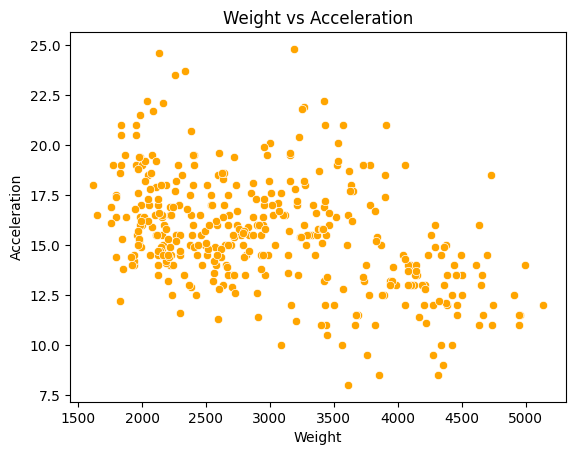

In [14]:
sns.scatterplot(data=df, x='weight', y='acceleration', color='orange')
plt.title("Weight vs Acceleration")
plt.xlabel("Weight")
plt.ylabel("Acceleration")

## Part 4: Modeling

**Fit a linear regression model to predict the mpg. Use *all* columns (other than your target) in your model to predict the concrete compressive strength.**
* Please use a random state of `42` when splitting your data
* Use 85% of the dataset for training and the other 15% for testing

In [15]:
X = df.drop(columns='mpg')
y = df['mpg']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=42)

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Part 5: Evaluation
### $R^2$ Score
---

Use `.score` to evaluate the $R^2$ score of our model.

In [19]:
# Training r2 score
lr.score(X_train, y_train)

0.8035729101226176

In [20]:
# Testing r2 score
lr.score(X_test, y_test)

0.8410150838677992

In [21]:
# Interpret the testing r2:
# 84.10% of the variability in mpg can be explained explained the features in our model. 

### RMSE Score
---

Use `mean_squared_error` to evaluate the RMSE score of our model.

`mean_squared_error` requires two parameters:
- `y_true` : The actual y values
- `y_pred` : Our model's predicted y values

Therefore, we need to use our model to make predictions first!

In [22]:
# Make predictions on training set
train_pred = lr.predict(X_train)

In [23]:
# Make predictions on test set
test_pred = lr.predict(X_test)

In [24]:
# Calculate RMSE on training set
root_mean_squared_error(y_train, train_pred)

3.4660256530195235

In [25]:
# Calculate RMSE on testing set
root_mean_squared_error(y_test, test_pred)

3.050298310327161

## Part 6: How does this compare to our baseline?!
---
Remember, in regression tasks, calculating a baseline often involves using a simple and intuitive strategy, such as predicting the mean of the target variable for all instances. This baseline serves as a benchmark for model performance, and comparing the model's performance metrics, such as Root Mean Squared Error (RMSE), against this baseline helps assess the added value and predictive capability of the model over a straightforward, naively predicted baseline. If our model doesn't beat the baseline, why would we use a model?!

In [26]:
# Putting it all together -- Calculate the baseline RMSE 
test_mean = y_test.mean()
baseline_pred = np.full_like(y_test, test_mean)


In [27]:
root_mean_squared_error(y_test, baseline_pred)

7.650051399301222

In [28]:
# We beat the baseline!!! 

## Part 7: Interpretation

The hiring manager is especially interested in learning more about the effects of [horsepower](https://www.britannica.com/science/horsepower) on mpg.

**They ask you what effect the horsepower has on mpg. How would you respond? Be as specific as possible.**

In [29]:
coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coef': lr.coef_})

In [30]:
coef_df

,Feature,Coef
0,cylinders,-0.194798
1,displacement,0.004068
2,horsepower,0.002962
3,weight,-0.006825
4,acceleration,0.099908
5,year,0.754343


<Axes: xlabel='Coef', ylabel='Feature'>

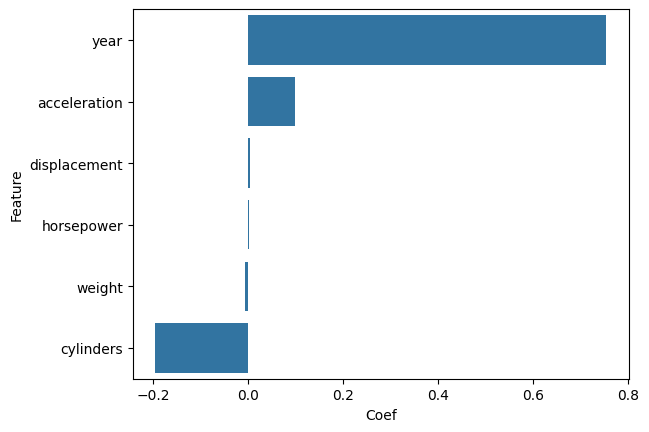

In [31]:
sns.barplot(data=coef_df.sort_values(by='Coef', ascending=False), x='Coef', y='Feature')

> Interpretation: HOLDING ALL OTHER FEATURES CONSTANT, for every one unit of horsepower increase, the mpg increases by 0.003 mpg. 